# Test 6.0

## Theory Question


Question 1: Explain InceptionNet with its modules.

Question 2: Explain Residual Networks (ResNet) and discuss why they are considered advantageous compared to other architectures.

## Practicle Question

- Load the chess dataset
    

# Step by Step instruction

#### Step 1: Load and Prepare the Dataset using ImageDataGenerator

    Task:
        - Load the Chessman Image Dataset from the specified directory using ImageDataGenerator. Specify the path to the dataset directory.
        - Create instances of ImageDataGenerator for training and validation, including data augmentation techniques.

        -  Generate batches of augmented image data for training and validation
            train_generator = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Traning'
                )

            validation_generator = valid_datagen.flow_from_directory(
                valid_data_dir,
                target_size=(224, 224),  # Adjust according to your model's input shape
                batch_size=32,
                class_mode='categorical',
                subset='Validation'
                )
        
#### Step 2: Define the Alexnet Architecture

    Task:
        - Construct a basic Alexnet architecture for image classification.Start with an input layer suitable for your dataset dimensions.(use 32  kernel filters only on each layer)
        - Stack convolutional layers (Conv2D) followed by pooling layers (MaxPooling2D).
        - Add fully connected layers (Dense) at the end with appropriate activation functions.

#### Step 3: Compile the Model

    Task:
        - Compile the ALexnet model for training.
        - Choose an appropriate optimizer (e.g., Adam).
        - Specify a loss function (e.g., categorical crossentropy) suitable for multi-class classification.
        - Add metrics to monitor during training (e.g., accuracy).

#### Step 4: Train the Model

    Task:
        - Train the Alexnet model using the training data prepared with ImageDataGenerator.
        - Fit the model using model.fit method, passing the training generator.
        - Specify number of epochs and batch size based on computational resources and dataset size.

#### Step 5: Evaluate the Model

    Task:
        - Evaluate the trained model on the validation data.
        - Use model.evaluate to calculate the model's performance metrics on unseen data.
        - Analyze metrics such as accuracy to assess model performance.

#### Step 6: Plot Training and Testing Loss
#### Step 7: Save the model in .h5 extension
#### Step 8: Load the model
#### Step 9: Test the model
    

In [ ]:
#AI/ML Trainer - Saurav
#Date 14 June 2024
#Time - 12:20

## Question 1

- InceptionNet (Originally called GoogLeNet) was a deep convolutional neural network architecture introduced by Google in 2014 like LeNet-5.
- A popular design, due to being very efficient and parameter light yet capable of deep architectures, used to handle the depth and width of convolutional neural networks in order to capture an extreme amount of spatial features for a reasonable computational cost.
- GoogLeNet (Inception v1)Introduced in the paper "Going Deeper with Convolutions" (2014) 22 layers deep, and composed of 9 Inception modules
- Significantly reduced the number of parameters as compared to previous architectures like AlexNet and VGG.
- Inception v2 refined the Inception modules that resulted in improving the original GoogLeNet. Enhanced convergence and training speed using Batch Normalization (BatchNorm) Even lower computational cost and improved performance

## Question 2

Residual Networks (ResNet) is a type of deep neural network architecture which is used in problems where you need to train very deep networks. Introduced by He et al. ResNet in the paper "Deep Residual Learning for Image Recognition" (2015), which allowed the training of networks that are hundreds or even thousands of layers deep without problems of the vanishing gradient.

- **ResNet MeritsMitigating the Vanishing Gradient Problem:** With the help of residual connections, ResNet makes it easier for the gradients to flow through the network while backpropagating and avoid vanishing in very deep networks.
- **Deeper Network Training and Generalization:** Residual connections enable training of very deep networks that leads to improved performance on challenging tasks.In practice, ResNets demonstrate that generalizing to new data can be improved in vision.
- **Less complicated Network Design:** The design of a residual block is simple and modular, so constructing and extending deeper networks is simple.
- **Flexibility:** The design of ResNet can be adapted to different tasks beyond image classification, like object detection, segmentation, and other vision tasks.

In [16]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [18]:
! kaggle datasets download -d yaswanthgali/sport-celebrity-image-classification

Dataset URL: https://www.kaggle.com/datasets/yaswanthgali/sport-celebrity-image-classification
License(s): CC0-1.0
 88% 13.0M/14.8M [00:01<00:00, 13.7MB/s]
100% 14.8M/14.8M [00:01<00:00, 8.88MB/s]


In [19]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sport-celebrity-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [31]:
# Define the paths
train_data_dir = '/content/Sports-celebrity'
valid_data_dir = '/content/Sports-celebrity'

In [32]:

# Create instances of ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(
    rescale=1.0/255.0
)

# Generate batches of augmented image data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 441 images belonging to 4 classes.
Found 441 images belonging to 4 classes.


In [39]:

# Define the input shape
input_shape = (224, 224, 3)
num_classes = 6

# Create the model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

# Flatten the output of the last pooling layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(4, activation='softmax'))


In [40]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [41]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 54, 54, 32)        11648     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 26, 26, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 32)          9248      
                                                                 
 conv2d_18 (Conv2D)          (None, 6, 6, 32)         

In [42]:
# Define number of epochs and batch size
epochs = 10
batch_size = 32

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10
13/13 [==============================] - 12s 586ms/step - loss: 1.3945 - accuracy: 0.2494 - val_loss: 1.3870 - val_accuracy: 0.2668
Epoch 2/10
13/13 [==============================] - 8s 594ms/step - loss: 1.3941 - accuracy: 0.2347 - val_loss: 1.3852 - val_accuracy: 0.2476
Epoch 3/10
13/13 [==============================] - 9s 723ms/step - loss: 1.3848 - accuracy: 0.2567 - val_loss: 1.3285 - val_accuracy: 0.3582
Epoch 4/10
13/13 [==============================] - 6s 499ms/step - loss: 1.3120 - accuracy: 0.3765 - val_loss: 1.2727 - val_accuracy: 0.4423
Epoch 5/10
13/13 [==============================] - 9s 729ms/step - loss: 1.3182 - accuracy: 0.4083 - val_loss: 1.2652 - val_accuracy: 0.3486
Epoch 6/10
13/13 [==============================] - 8s 611ms/step - loss: 1.2577 - accuracy: 0.4377 - val_loss: 1.2017 - val_accuracy: 0.4976
Epoch 7/10
13/13 [==============================] - 7s 523ms/step - loss: 1.2486 - accuracy: 0.4719 - val_loss: 1.2319 - val_accuracy: 0.4255
Epoch

In [43]:
# Evaluate the model on the validation data
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")

14/14 [==============================] - 1s 83ms/step - loss: 1.1143 - accuracy: 0.5374
Validation Loss: 1.1142553091049194
Validation Accuracy: 0.5374149680137634


In [44]:
import matplotlib.pyplot as plt


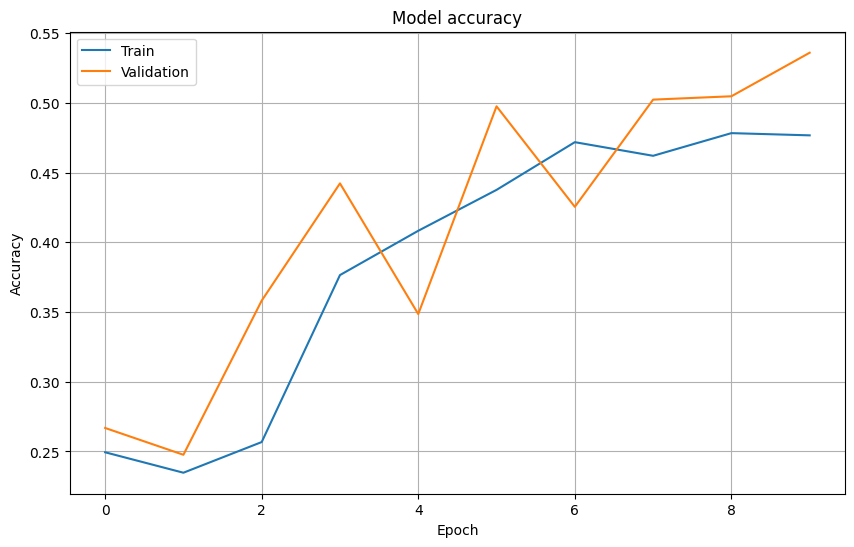

In [45]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()

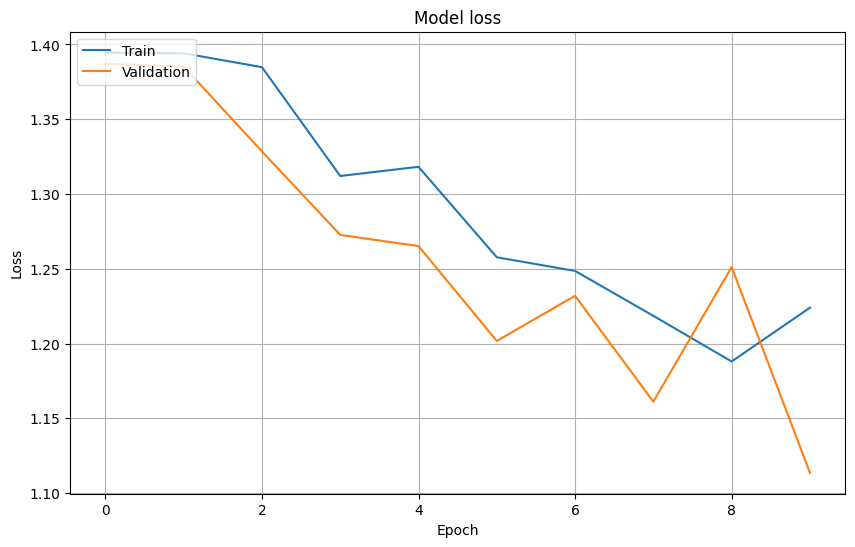

In [46]:
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid()
plt.show()